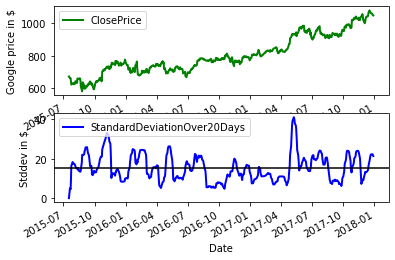

In [2]:
import pandas as pd

from pandas_datareader import data

start_date = '2014-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME = 'goog_data.pkl'

try:
    goog_data2 = pd.read_pickle(SRC_DATA_FILENAME)
except FileNotFoundError:
    goog_data2 = data.DataReader('GOOG', 'yahoo', start_date, end_date)
    goog_data2.to_pickle(SRC_DATA_FILENAME)

goog_data = goog_data2.tail(620)

close = goog_data['Close']

'''
Standard Deviation is a statistical calculation
 used to measure the variability. In trading this value is known
 as volatility. A low standard deviation indicates that the data
 points tend to be very close to the mean, whereas high standard
 deviation indicates that the data points are spread out over a large
 range of values.
n = number of periods
Calculate the moving average.
 The formula is:
d = ((P1-MA)^2 + (P2-MA)^2 + ... (Pn-MA)^2)/n
Pn is the price you pay for the nth interval
n is the number of periods you select
Take the square root of d. This gives you the standard deviation.
stddev = sqrt(d)
 '''
import statistics as stats
import math as math

time_period = 20 # look back period
history = [] # history of prices
sma_values = [] # to track moving average values for visualization purposes
stddev_values = [] # history of computed stdev values

for close_price in close:
    history.append(close_price)
    if len(history) > time_period: # we track at most 'time_period' number of prices
        del (history[0])

    sma = stats.mean(history)
    sma_values.append(sma)
    variance = 0 # variance is square of standard deviation
    for hist_price in history:
        variance = variance + ((hist_price - sma) ** 2)

    stdev = math.sqrt(variance / len(history))

    stddev_values.append(stdev)

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(StandardDeviationOver20Days=pd.Series(stddev_values, index=goog_data.index))

close_price = goog_data['ClosePrice']
stddev = goog_data['StandardDeviationOver20Days']

import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(211, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='Stddev in $')
stddev.plot(ax=ax2, color='b', lw=2., legend=True)
ax2.axhline(y=stats.mean(stddev_values), color='k')
plt.show()

In [8]:
def company_stock_STD(ticker, data_source, start_date, end_date):
    """
    the purpose of the function is to get the standard deviation
    inputs:
    ticker name of the company
    source of the data example yahoo
    start date yyyy-mm-dd
    end date
    
    """
    df = data.DataReader(ticker, data_source, start_date, end_date)
    close = df['Close']

    '''
    Standard Deviation is a statistical calculation
     used to measure the variability. In trading this value is known
     as volatility. A low standard deviation indicates that the data
     points tend to be very close to the mean, whereas high standard
     deviation indicates that the data points are spread out over a large
     range of values.
    n = number of periods
    Calculate the moving average.
     The formula is:
    d = ((P1-MA)^2 + (P2-MA)^2 + ... (Pn-MA)^2)/n
    Pn is the price you pay for the nth interval
    n is the number of periods you select
    Take the square root of d. This gives you the standard deviation.
    stddev = sqrt(d)
     '''
    import statistics as stats
    import math as math

    time_period = 30 # look back period
    history = [] # history of prices
    sma_values = [] # to track moving average values for visualization purposes
    stddev_values = [] # history of computed stdev values

    for close_price in close:
        history.append(close_price)
        if len(history) > time_period: # we track at most 'time_period' number of prices
            del (history[0])

        sma = stats.mean(history)
        sma_values.append(sma)
        variance = 0 # variance is square of standard deviation
        for hist_price in history:
            variance = variance + ((hist_price - sma) ** 2)

        stdev = math.sqrt(variance / len(history))

        stddev_values.append(stdev)

    df = df.assign(ClosePrice=pd.Series(close, index=df.index))
    df = df.assign(StandardDeviationOver20Days=pd.Series(stddev_values, index=df.index))

    close_price = df['ClosePrice']
    stddev = df['StandardDeviationOver20Days']

    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(14,12))
    ax1 = fig.add_subplot(211, ylabel=ticker +' price in $')
    close_price.plot(ax=ax1, color='g', lw=2., legend=True)
    ax2 = fig.add_subplot(212, ylabel='Stddev in $')
    stddev.plot(ax=ax2, color='b', lw=2., legend=True)
    ax2.axhline(y=stats.mean(stddev_values), color='k')
    plt.show()

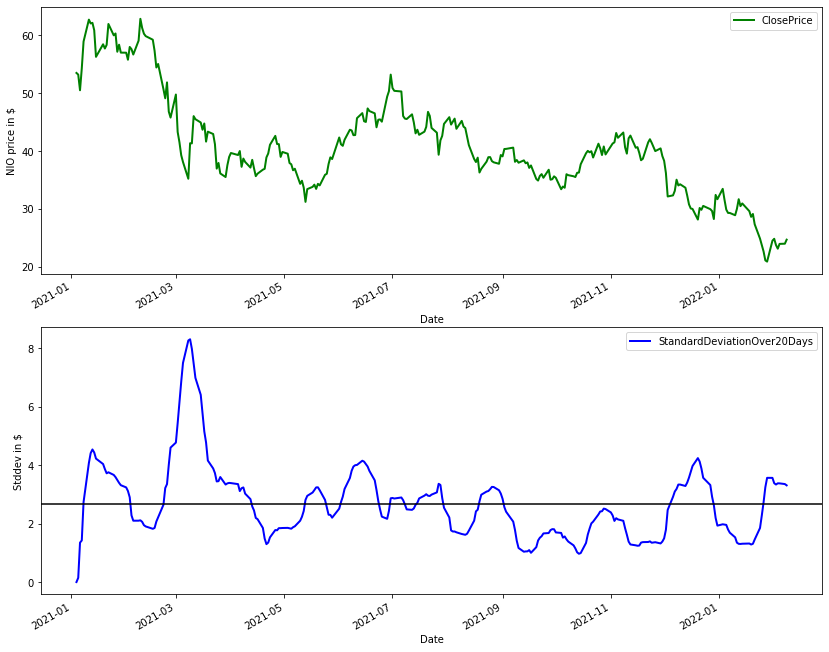

In [10]:
company_stock_STD('NIO', 'yahoo', '2021-01-01', '2022-02-08')